In [182]:
%run functions.py

In [183]:
import pickle
cl = pickle.load(open( "pickles/cl.p", "rb" ) )
clusters = pickle.load( open( "pickles/clusters.p", "rb" ) )
categs = pickle.load( open( "pickles/categs.p", "rb" ) )
colors = pickle.load(open( "pickles/colors.p", "rb" ) )
df = pickle.load(open( "pickles/df.p", "rb" ) )
dflabel = pickle.load(open( "pickles/dflabel.p", "rb" ) )
df_summary = pickle.load(open( "pickles/dfsummary.p", "rb" ) )

In [185]:
#put cluster sizes into summary dataframe
cluster_sizes = pd.Series(cl.labels_).value_counts()
df_summary['cluster_size'] = cluster_sizes

In [186]:
cluster_sizes

4      10924
6      10577
5       4812
3       4094
1       3532
0        940
7        398
101      307
102      180
100      153
dtype: int64

In [187]:
df_summary.sort_values('cluster_size', ascending=False, axis=0, inplace=True)
df_summary

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size
4,10.393283,11.664529,270.510778,27.220618,1.174042e+05,11610.656482,488.488700,43.487529,1.427194e+05,12555.089423,...,9.593741e+03,0.004532,0.011816,1.357284e+06,2.126856e+06,1.699926e+06,2.480428e+06,13.484205,151.141433,10924
6,7.073894,9.831409,23.255366,3.835775,8.736515e+03,1288.340742,105.528858,11.441945,3.066219e+04,3199.489001,...,2.103847e+03,0.008418,0.020346,1.592418e+06,2.299231e+06,1.924684e+06,2.537035e+06,11.731188,69.302554,10577
5,11.022481,164.681659,51.073284,5.414399,2.127130e+04,1996.625682,143.459824,1.268474,5.007640e+04,310.506826,...,3.724772e+03,0.006396,0.012476,9.175901e+04,8.409094e+04,1.402096e+06,1.780078e+06,9.821069,70.655242,4812
3,15.997603,18.002698,3927.974700,253.698710,1.624139e+06,104594.166795,5969.649221,344.251311,1.850896e+06,106388.861864,...,1.408909e+05,0.007149,0.022023,6.617401e+05,1.177156e+06,1.071403e+06,1.713942e+06,14.995804,780.155936,4094
1,51.600705,89.592694,1088.277830,22.683255,4.567225e+05,9006.771033,1318.223318,15.914663,5.452825e+05,6177.397685,...,5.466213e+04,0.001769,0.004948,1.676059e+05,3.276882e+05,3.195242e+05,5.980847e+05,12.605993,126.017271,3532
0,5.087733,8.842545,22.935497,6.389589,5.702858e+03,1288.833874,190.264186,23.543834,5.683028e+04,6676.159765,...,4.392961e+03,0.005917,0.017536,3.449621e+05,5.010912e+05,2.694610e+03,2.048144e+03,8.826901,125.254086,940
7,64.533564,42.862527,677.284901,13.661454,1.812594e+05,2953.025360,641.457782,18.186438,1.407813e+05,3453.473875,...,8.799642e+03,5.284328,163.881650,6.024290e+05,1.230909e+06,4.307867e+05,9.388198e+05,21.229853,148.395309,398
101,3431.940152,966.970010,9373.564121,3.592122,3.036421e+06,892.049734,8034.395537,10.038870,2.641065e+06,2753.890799,...,3.150631e+05,0.004526,0.028276,1.624177e+04,6.018272e+04,4.678217e+03,2.036080e+04,13.922656,272.152056,307
102,358.484301,1897.352574,59789.855695,169.199613,2.651234e+07,74298.108365,66320.981401,37.434199,2.941622e+07,15541.324182,...,2.658352e+06,0.016187,0.035242,1.107446e+04,6.810952e+04,5.828433e+04,1.725078e+05,23.771647,586.432294,180
100,47421.886129,15303.559647,466289.159960,10.749649,1.789520e+08,3775.073507,415512.931252,30.503648,1.536862e+08,10052.832155,...,1.195675e+07,0.030282,0.386432,1.845196e+03,1.741381e+04,5.691929e+02,5.051282e+03,46.107640,1814.985272,153


## Radar Plot

In [188]:
df_radar = df_summary

In [189]:
df_radar['label'] = df_radar.index

In [190]:
df_radar = df_radar.reset_index()

In [191]:
df_radar.set_index('label', inplace=True)

In [192]:
df_radar[df_radar<0] = 0

In [193]:
##testing
df_radar['incoming_std_time_btwn_txns'] = df_radar['incoming_std_time_btwn_txns']/df_radar['incoming_avg_time_btwn_txns']
df_radar['outgoing_std_time_btwn_txns'] = df_radar['outgoing_std_time_btwn_txns']/df_radar['outgoing_avg_time_btwn_txns']

In [194]:
#log scale
df_radar = np.log1p(df_radar)+1

In [195]:
df_radar

,index,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,...,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance,cluster_size
label,,,,,,,,,,,,,,,,,,,,,
4,2.609438,3.433024,3.538805,6.604002,4.340053,12.673386,10.359765,7.193361,4.795209,12.868643,...,10.168970,1.004521,1.011747,15.120997,1.942736,15.346096,1.899811,3.673059,6.024811,10.298809
6,2.945910,3.088636,3.382450,4.188638,2.576041,10.075381,8.161886,5.668416,3.521073,11.330818,...,8.651998,1.008383,1.020142,15.280765,1.893579,15.470273,1.840772,3.544055,5.252808,10.266532
5,2.791759,3.486778,6.110068,4.952652,2.858545,10.965161,8.599715,5.973001,1.819107,11.821325,...,9.223029,1.006376,1.012399,12.426932,1.650465,15.153480,1.819596,3.381495,5.271866,9.479076
3,2.386294,3.833072,3.944581,9.276134,6.540081,15.300489,12.557853,9.694611,6.844273,15.431181,...,12.855748,1.007124,1.021784,14.402630,2.022048,14.884480,1.955403,3.772326,7.660775,9.317522
1,1.693147,4.962730,5.506374,7.993270,4.164768,14.031834,10.105843,8.184798,3.828181,14.209061,...,11.908945,1.001767,1.004936,13.029377,2.083536,13.674591,2.054938,3.610510,5.844323,9.169903
0,1.000000,2.806276,3.286714,4.175363,3.000072,9.648898,8.162269,6.253656,4.200461,11.947842,...,9.387986,1.005899,1.017384,13.751193,1.897148,8.899380,1.565365,3.285124,5.838296,7.846943
7,3.079442,5.182562,4.781060,7.519567,3.685222,13.107690,8.990924,7.465301,3.954204,12.854970,...,10.082580,2.838059,6.105228,14.308727,2.112924,13.973371,2.156666,4.101436,6.006596,6.988961
101,5.624973,9.141172,7.875201,10.145755,2.524342,15.926190,7.794642,9.991612,3.401423,15.786693,...,13.660531,1.004516,1.027884,10.695403,2.548717,9.450886,2.677518,3.702881,6.610029,6.730100
102,5.634729,6.884671,8.548742,11.998608,6.136972,18.093121,12.215854,12.102277,4.648948,18.197057,...,15.793217,1.016058,1.034636,10.312487,2.967132,11.973106,2.376184,4.209700,7.375761,6.198497


In [196]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

label with my name for category
round negative results in summary to zero


In [197]:
ls = list(df_radar)[1:-1]

In [198]:
feats = ['outgoing_txns','outgoing_avg_time_btwn_txns','outgoing_std_time_btwn_txns','total_usd_sent',
            'incoming_txns','incoming_avg_time_btwn_txns','incoming_std_time_btwn_txns','total_usd_recd', 
            'contracts_created','contract_txns_sent','eth_balance','num_tokens_used', ]

In [199]:
feats = df.columns[1:].values

In [200]:
d = {feats[i]:chr(65+i) for i in range(len(feats))}

In [201]:
d

{'outgoing_txns': 'A',
 'incoming_txns': 'B',
 'total_eth_sent': 'C',
 'avg_eth_sent': 'D',
 'total_usd_sent': 'E',
 'avg_usd_sent': 'F',
 'total_eth_recd': 'G',
 'avg_eth_recd': 'H',
 'total_usd_recd': 'I',
 'avg_usd_recd': 'J',
 'active_months': 'K',
 'monthly_outgoing_txns': 'L',
 'monthly_incoming_txns': 'M',
 'monthly_eth_sent': 'N',
 'monthly_usd_sent': 'O',
 'monthly_eth_recd': 'P',
 'monthly_usd_recd': 'Q',
 'contracts_created': 'R',
 'contract_txns_sent': 'S',
 'incoming_avg_time_btwn_txns': 'T',
 'incoming_std_time_btwn_txns': 'U',
 'outgoing_avg_time_btwn_txns': 'V',
 'outgoing_std_time_btwn_txns': 'W',
 'num_tokens_used': 'X',
 'eth_balance': 'Y'}

In [202]:
dfr = df_radar[feats]

In [203]:
#setting up color map
NUM_COLORS = cl.n_clusters
cmp = plt.get_cmap('viridis', 12)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


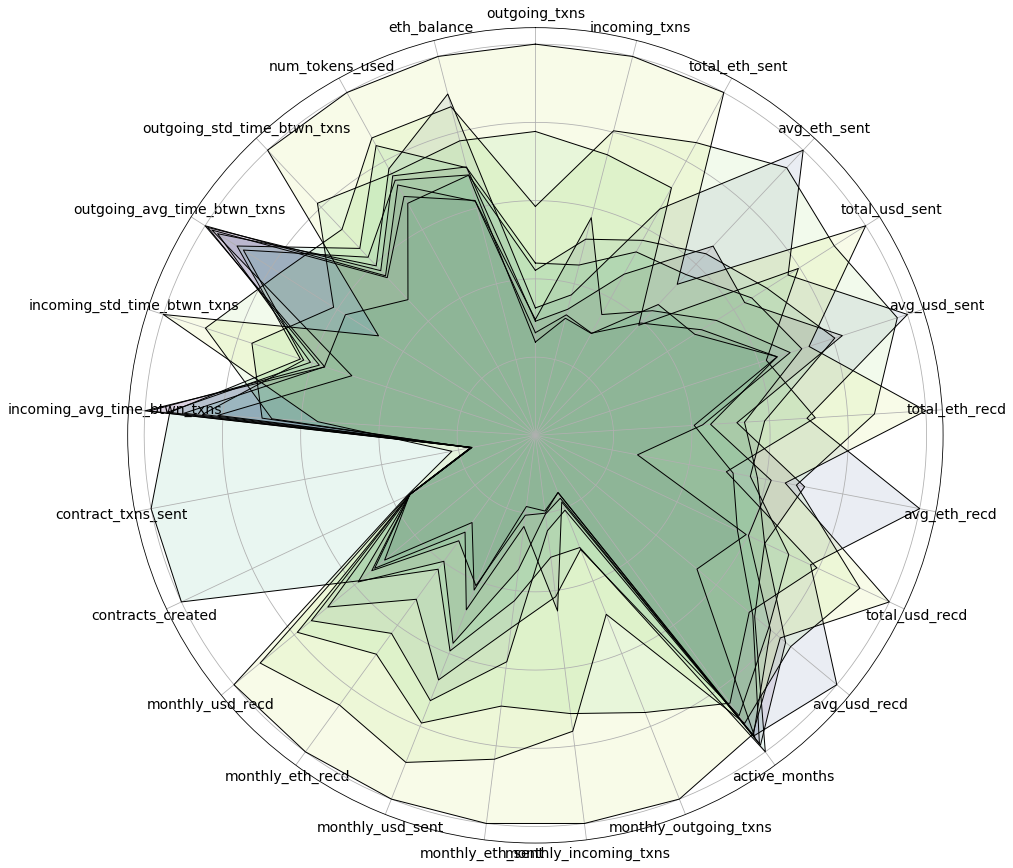

In [204]:
# Libraries
from math import pi

 
fig = plt.figure(figsize=(15,15))
# ------- PART 1: Create background
 
# number of variable
categories=list(dfr)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
ax.set_color_cycle([cmp(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)
# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
for i in range(10):
    # Ind1
    lbl = df_radar.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid',color='k', label=lbl)
    ax.fill(angles, values, alpha=0.1)
 
 
# # Add legend
# plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.2, 1))

In [205]:
total_eth = {}
total_addresses = {}

for clust in np.unique(cl.labels_):
    mask = cl.labels_==clust
    eth = np.sum(df[mask]['eth_balance'])
    size = np.sum(cl.labels_==clust)
    total_eth[clust] = eth
    total_addresses[clust] = size

In [206]:

names = np.array(list(total_eth.keys()))
values = np.array(list(total_eth.values()))
indices = np.argsort(values)

names = names[indices][::-1]
values = values[indices][::-1]

In [207]:
names
dfr=dfr.loc[names]

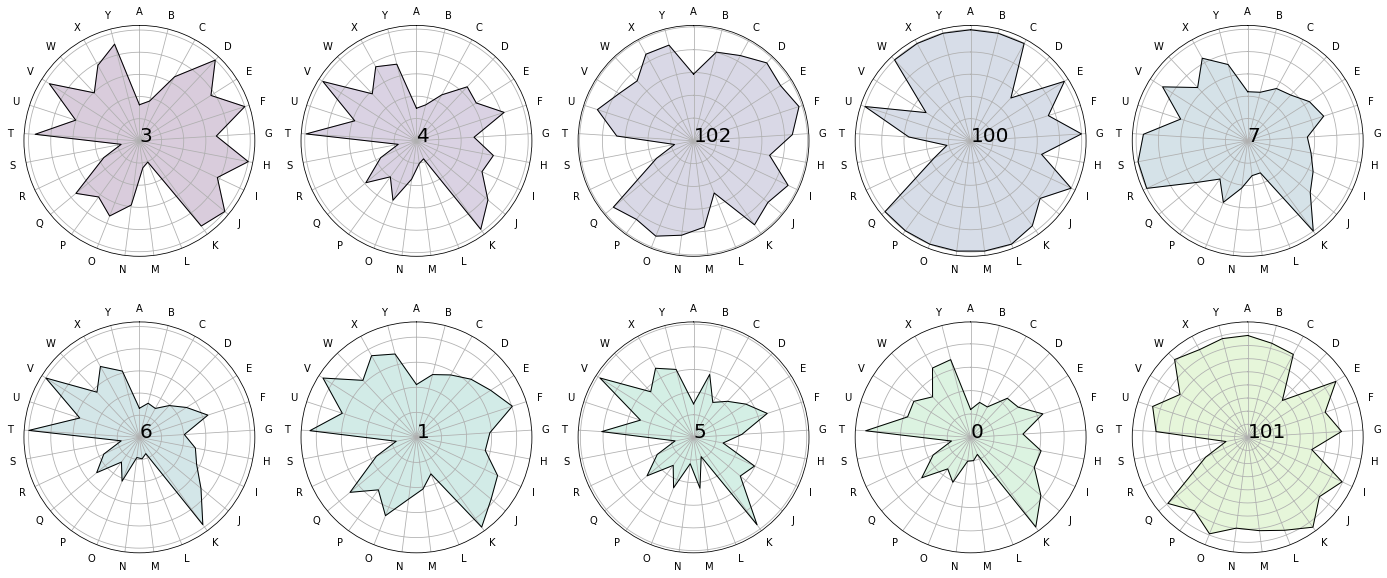

In [208]:
import matplotlib as mpl

from pylab import *

fig = plt.figure(figsize=(24,10))
# ------- PART 1: Create background

# number of variable
categories=list(dfr)
categories=list(d.values())
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

for i,c in enumerate(names):
    rgb = cmp(i)[:3] # will return rgba, we take only first 3 so we get rgb
    # Initialise the spider plot
    ax = plt.subplot(2,5,i+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)
    plt.xticks(fontsize=10)
    # Draw ylabels
    # ax.set_rlabel_position(0)
    # plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    # plt.ylim(0,40)
    ax.set_yticklabels([])
     #hide labels
#     ax.set_xticklabels([])
 
# # Plot each individual = each line of the data
 

    lbl = dfr.index[i]
    values=dfr.loc[lbl].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1,c='k', linestyle='solid')
    ax.fill(angles, values, alpha=0.2,c=rgb, label=lbl)
 
    ax.text(1,0, str(lbl), fontsize=20)


In [209]:
dfdf = pd.DataFrame(pd.Series(d))

In [210]:
dfdf.sort_values(by=0)

,0
outgoing_txns,A
incoming_txns,B
total_eth_sent,C
avg_eth_sent,D
total_usd_sent,E
avg_usd_sent,F
total_eth_recd,G
avg_eth_recd,H
total_usd_recd,I
avg_usd_recd,J


In [211]:
names

array([  3,   4, 102, 100,   7,   6,   1,   5,   0, 101], dtype=int32)

In [212]:
dftest=df_summary.loc[names]

In [213]:
dftest=dftest[dftest.columns[:-2]]

In [214]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

In [290]:
cos_sim = cosine_similarity(dftest)

In [291]:
idxs = np.argsort(cos_sim[-1])

In [292]:
test = cos_sim[idxs]

In [293]:
lbls = dftest.index[idxs]

In [294]:
dftest

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance
3,15.997603,18.002698,3927.974700,253.698710,1.624139e+06,104594.166795,5969.649221,344.251311,1.850896e+06,106388.861864,...,455.292625,1.408909e+05,0.007149,0.022023,6.617401e+05,1.177156e+06,1.071403e+06,1.713942e+06,14.995804,780.155936
4,10.393283,11.664529,270.510778,27.220618,1.174042e+05,11610.656482,488.488700,43.487529,1.427194e+05,12555.089423,...,33.139680,9.593741e+03,0.004532,0.011816,1.357284e+06,2.126856e+06,1.699926e+06,2.480428e+06,13.484205,151.141433
102,358.484301,1897.352574,59789.855695,169.199613,2.651234e+07,74298.108365,66320.981401,37.434199,2.941622e+07,15541.324182,...,5994.220340,2.658352e+06,0.016187,0.035242,1.107446e+04,6.810952e+04,5.828433e+04,1.725078e+05,23.771647,586.432294
100,47421.886129,15303.559647,466289.159960,10.749649,1.789520e+08,3775.073507,415512.931252,30.503648,1.536862e+08,10052.832155,...,32328.061456,1.195675e+07,0.030282,0.386432,1.845196e+03,1.741381e+04,5.691929e+02,5.051282e+03,46.107640,1814.985272
7,64.533564,42.862527,677.284901,13.661454,1.812594e+05,2953.025360,641.457782,18.186438,1.407813e+05,3453.473875,...,44.394591,8.799642e+03,5.284328,163.881650,6.024290e+05,1.230909e+06,4.307867e+05,9.388198e+05,21.229853,148.395309
6,7.073894,9.831409,23.255366,3.835775,8.736515e+03,1288.340742,105.528858,11.441945,3.066219e+04,3199.489001,...,7.463463,2.103847e+03,0.008418,0.020346,1.592418e+06,2.299231e+06,1.924684e+06,2.537035e+06,11.731188,69.302554
1,51.600705,89.592694,1088.277830,22.683255,4.567225e+05,9006.771033,1318.223318,15.914663,5.452825e+05,6177.397685,...,132.804677,5.466213e+04,0.001769,0.004948,1.676059e+05,3.276882e+05,3.195242e+05,5.980847e+05,12.605993,126.017271
5,11.022481,164.681659,51.073284,5.414399,2.127130e+04,1996.625682,143.459824,1.268474,5.007640e+04,310.506826,...,10.956925,3.724772e+03,0.006396,0.012476,9.175901e+04,8.409094e+04,1.402096e+06,1.780078e+06,9.821069,70.655242
0,5.087733,8.842545,22.935497,6.389589,5.702858e+03,1288.833874,190.264186,23.543834,5.683028e+04,6676.159765,...,15.322656,4.392961e+03,0.005917,0.017536,3.449621e+05,5.010912e+05,2.694610e+03,2.048144e+03,8.826901,125.254086
101,3431.940152,966.970010,9373.564121,3.592122,3.036421e+06,892.049734,8034.395537,10.038870,2.641065e+06,2753.890799,...,963.167589,3.150631e+05,0.004526,0.028276,1.624177e+04,6.018272e+04,4.678217e+03,2.036080e+04,13.922656,272.152056


In [295]:
idxs

array([5, 7, 1, 8, 4, 6, 0, 2, 3, 9])

In [296]:
lbls

Int64Index([6, 5, 4, 0, 7, 1, 3, 102, 100, 101], dtype='int64')

In [312]:
cmap=cm.get_cmap('YlGnBu')

In [313]:
from matplotlib.colors import LogNorm, PowerNorm

Text(114,0.5,'Cluster Number')

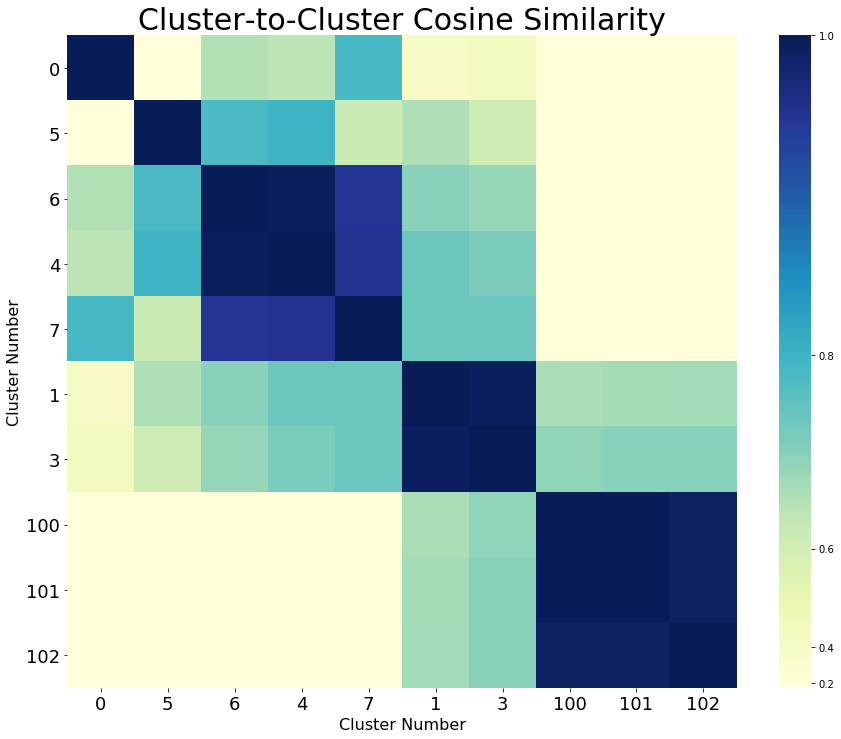

In [314]:
fig = plt.figure(figsize=(15,12))

# sns.heatmap(cos_sim,xticklabels=dftest.index, cmap=cm.get_cmap('Blues'),yticklabels=dftest.index, cbar=False)
sns.heatmap(test,xticklabels=lbls, cmap=cmap,yticklabels=lbls,cbar=True, norm=PowerNorm(gamma=3))
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18,rotation=0)
plt.xlabel("Cluster Number", fontsize=16)
plt.ylabel("Cluster Number", fontsize=16)

In [361]:
lbls = [0,5,6,4,7,1,3,100,101,102]

In [316]:
dftest2 = dftest.loc[lbls]

In [317]:
cos_sim=cosine_similarity(dftest2)

In [318]:
test=cos_sim

In [319]:
test.shape

(10, 10)

In [367]:
lbls = ['Exchange' if l==100 else 'Exchange #2' if l==102 else 'Mining' if l==101 else 'ICO Wallets' if l==3 else l for l in lbls]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

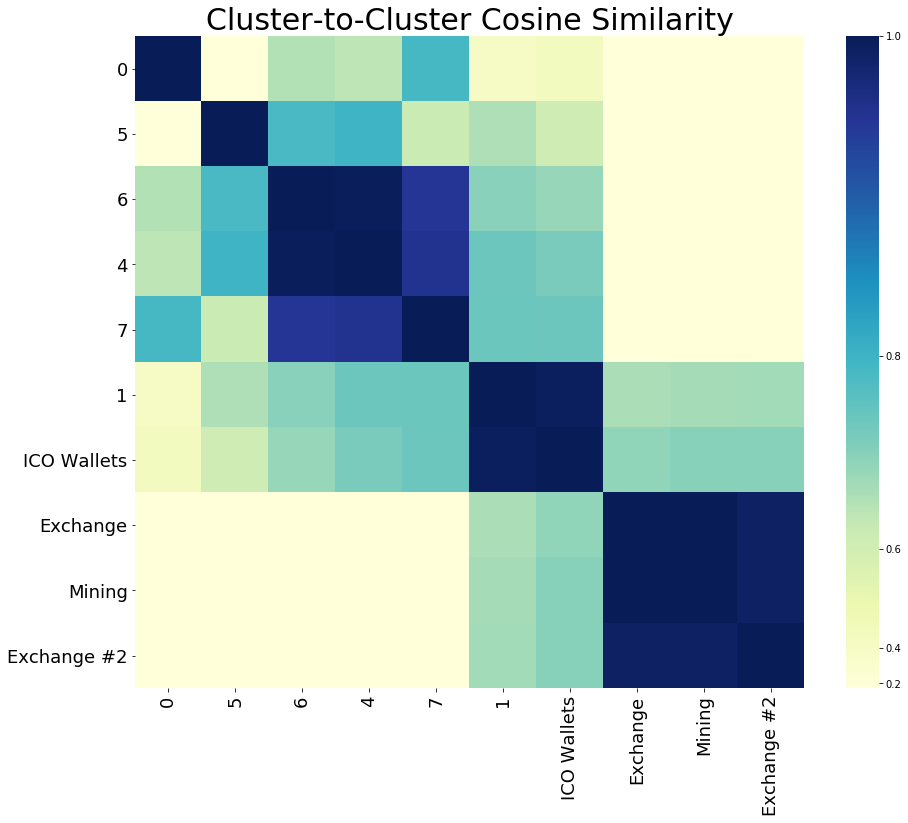

In [369]:
fig = plt.figure(figsize=(15,12))

sns.heatmap(test,xticklabels=lbls, cmap=cmap,yticklabels=lbls,cbar=True, norm=PowerNorm(gamma=3))
plt.title('Cluster-to-Cluster Cosine Similarity', fontsize=30)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18,rotation=0)



In [321]:
from sklearn.cluster import AgglomerativeClustering

In [322]:
ag = AgglomerativeClustering(n_clusters=8)

In [323]:
c = cl.cluster_centers_
df_scaled = pd.DataFrame(c, columns = df.columns[1:], index=np.unique(cl.labels_))

In [324]:
df_scaled

,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,avg_usd_sent,total_eth_recd,avg_eth_recd,total_usd_recd,avg_usd_recd,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,eth_balance
0,-1.395706,1.584574,-2.880485,2.396647,-0.919042,2.074973,2.528839,-1.186790,-0.760875,-0.280483,...,-0.044314,0.017389,0.007131,-0.005284,0.011790,-0.003140,0.003909,0.005943,0.001213,-2.577676e-05
1,2.834697,1.796405,-0.227648,-0.156899,-0.195624,-0.476011,-0.068500,0.165511,-0.006258,-0.033661,...,0.052113,0.011993,-0.035079,-0.030715,0.007077,-0.004490,-0.000253,0.000970,0.001310,3.919683e-04
3,4.863868,-2.072687,-0.259332,-0.356552,0.251852,0.384453,-0.081174,-0.184666,-0.000448,-0.031058,...,-0.008965,-0.012825,-0.006822,0.068190,0.009837,0.008384,-0.000119,-0.001842,-0.001257,-9.609500e-04
4,0.308848,-1.245486,0.064806,-0.010561,-0.090784,-0.162154,0.078966,0.095624,0.027914,0.040731,...,0.004909,0.000068,0.026069,-0.016604,-0.007385,-0.007344,0.000324,-0.000657,0.001591,4.546286e-04
5,-1.745657,2.667086,0.534225,-1.446995,0.543552,0.109255,0.147952,-0.193867,-0.070831,0.008568,...,-0.035624,-0.033426,0.044343,0.043262,-0.019481,-0.000974,0.000927,-0.000377,0.000198,7.147312e-04
6,-2.846184,-0.340536,-0.067058,0.315716,-0.238756,-0.058442,-0.263176,0.099972,0.041843,0.009418,...,0.007624,0.012483,-0.029092,-0.014214,0.009546,0.005868,-0.000976,0.000818,-0.001503,-5.745118e-04
7,1.416000,1.683554,4.564700,6.840965,6.699612,0.072042,-0.126849,0.048874,-0.444898,-0.103212,...,0.020146,-0.009140,0.009269,-0.006279,0.004824,0.002797,-0.001484,-0.001149,-0.000625,-8.057967e-04
100,3.919578,-1.583218,0.375249,-0.075366,-0.086016,-0.071375,-0.037219,-0.084816,-0.032192,-0.009259,...,-0.004661,-0.001498,-0.000225,0.000347,0.001256,0.001084,0.000073,0.000305,0.000052,4.214385e-06
101,-2.298382,-0.781116,0.173888,-0.067028,0.123600,0.057985,-0.029532,-0.038094,-0.011891,-0.012368,...,-0.000524,-0.001132,-0.001137,-0.000677,-0.000090,-0.000083,0.000014,-0.000046,0.000001,6.841683e-07
102,0.588378,2.677972,-0.615537,0.178381,-0.137693,-0.038227,0.082005,0.137066,0.047645,0.028964,...,0.004855,0.003203,0.002131,0.000859,-0.000914,-0.000780,-0.000086,-0.000181,-0.000046,-4.749115e-06


In [325]:
fitag = ag.fit(dftest)

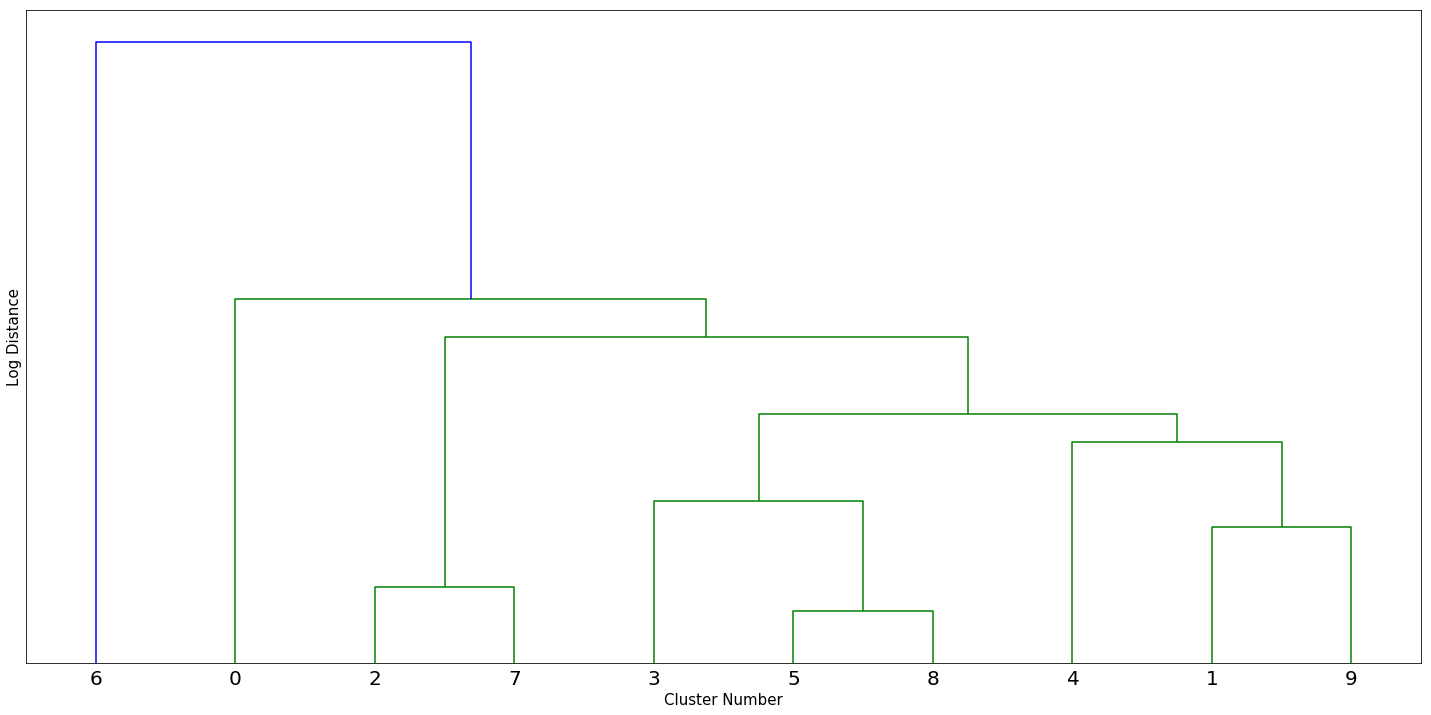

In [326]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(df_scaled, method='average',metric='euclidean')
fig=plt.figure(figsize=(25,12))
dendrogram(Z,color_threshold=8) 
# plt.ylim(0,1e8)
# plt.yscale('log')
# plt.ylim(1.5,60)
# plt.title("Cluster Dendrogram", fontsize=30)
plt.ylabel('Log Distance', fontsize=15)
plt.yticks([])
plt.xlabel("Cluster Number", fontsize=15)
plt.xticks(fontsize=20, rotation='horizontal')
plt.show()

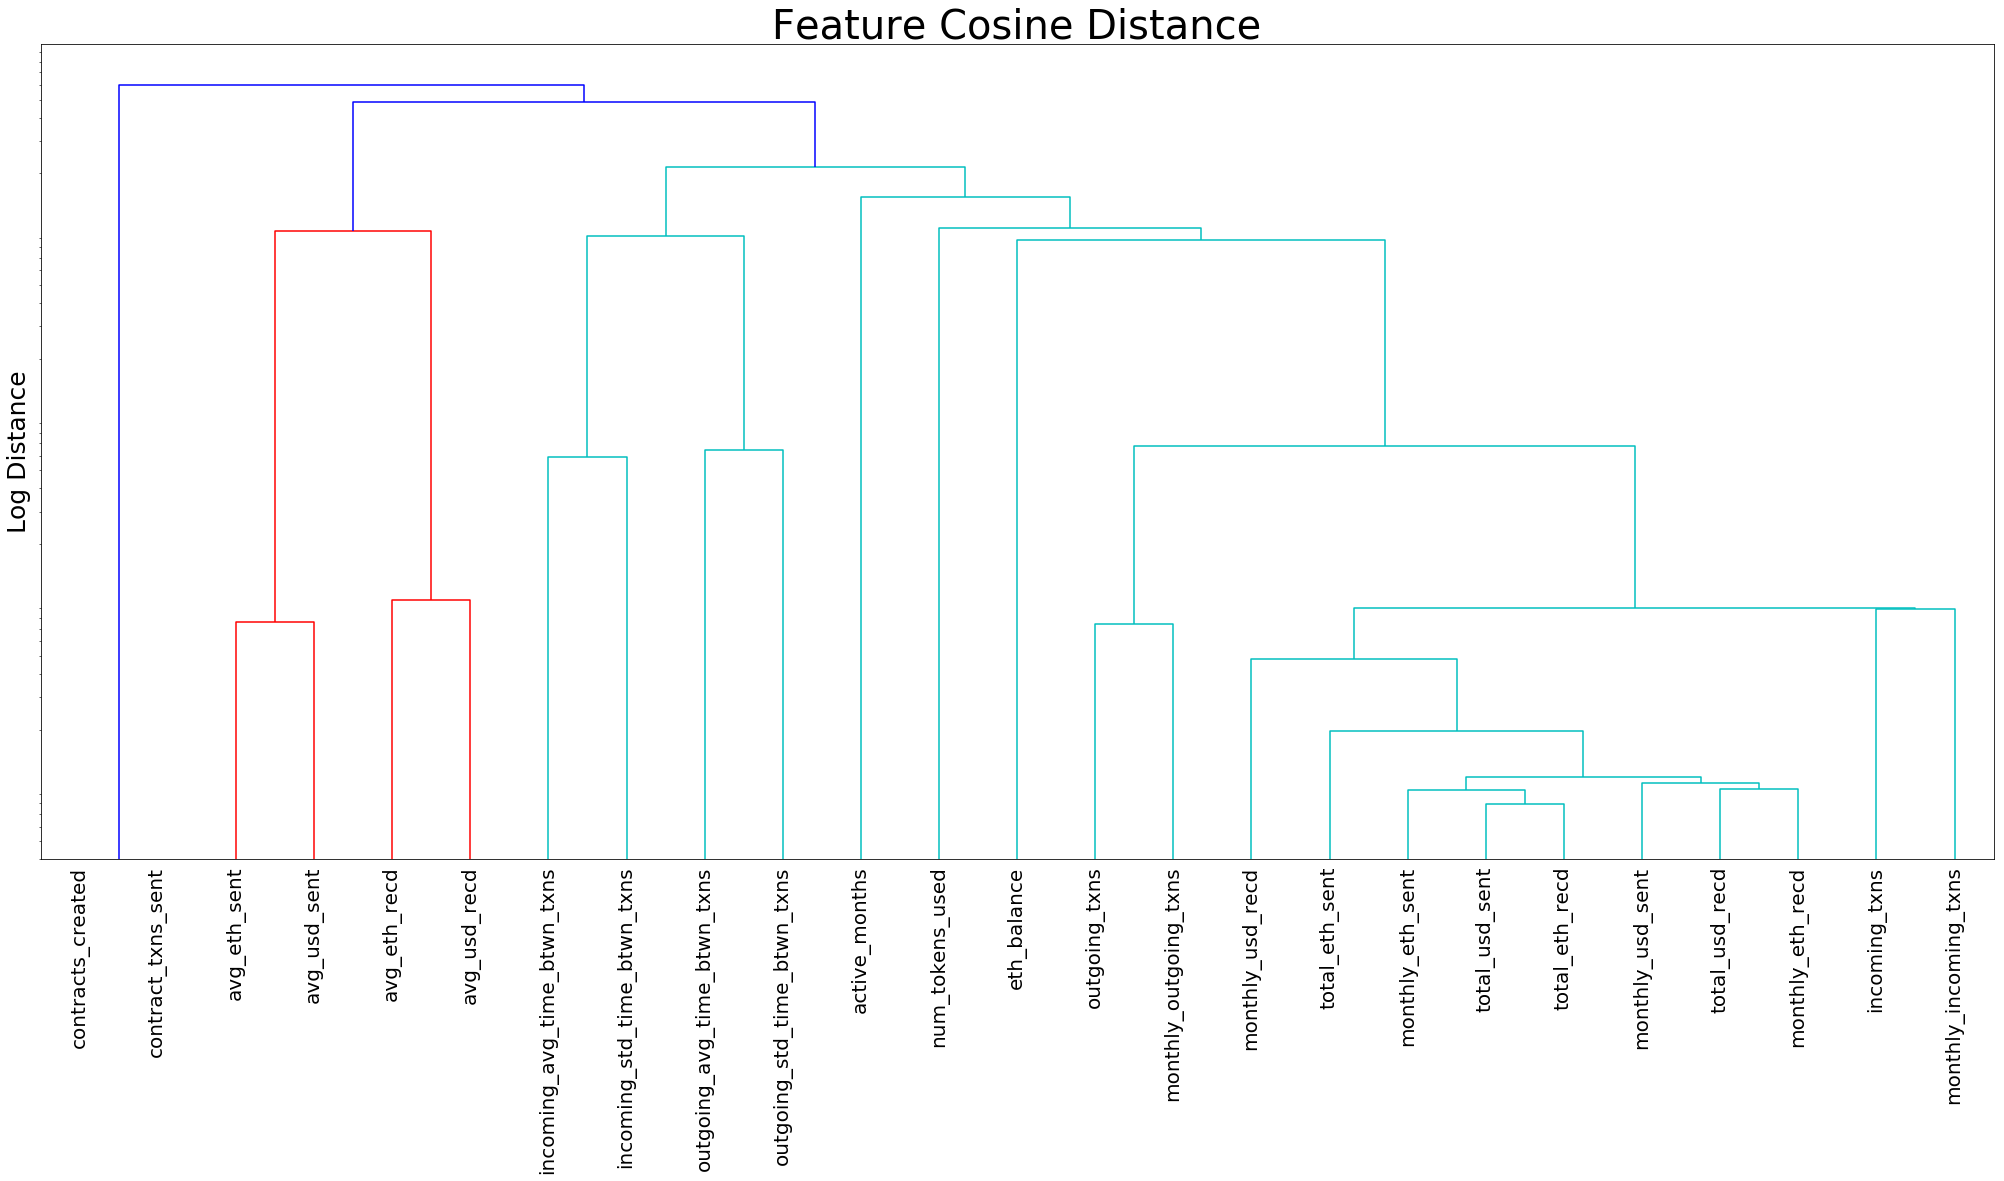

In [327]:

Z = linkage(dftest.T, metric='cosine')
fig=plt.figure(figsize=(35,15))
dendrogram(Z,labels=dftest.columns, color_threshold=.4) 
# plt.ylim(0,1e8)
plt.yscale('log')
plt.ylim(.00004,1)
plt.title("Feature Cosine Distance", fontsize=40)
plt.ylabel('Log Distance', fontsize=25)
plt.yticks([])

plt.xticks(fontsize=20, rotation='vertical')
plt.show()

In [328]:
df_summary.columns[8]

'total_usd_recd'

In [329]:
df_radar = df_summary#.loc[list(clusters)]

In [330]:
df_radar['label'] = df_radar.index

In [331]:
df_radar = df_radar.reset_index()

In [332]:
df_radar.set_index('label', inplace=True)

In [333]:
df_radar[df_radar<0] = 0

In [334]:
##testing
df_radar['incoming_std_time_btwn_txns'] = df_radar['incoming_std_time_btwn_txns']/df_radar['incoming_avg_time_btwn_txns']
df_radar['outgoing_std_time_btwn_txns'] = df_radar['outgoing_std_time_btwn_txns']/df_radar['outgoing_avg_time_btwn_txns']

In [335]:
#log scale
df_radar = np.log1p(df_radar)+1

label with my name for category
round negative results in summary to zero


In [336]:
# scale by max present per column

for col in df_radar.columns:
    df_radar[col] = [val/max(df_radar[col]) for val in df_radar[col]]

label with my name for category
round negative results in summary to zero


In [337]:
list(df_radar)[1:-1]

['outgoing_txns',
 'incoming_txns',
 'total_eth_sent',
 'avg_eth_sent',
 'total_usd_sent',
 'avg_usd_sent',
 'total_eth_recd',
 'avg_eth_recd',
 'total_usd_recd',
 'avg_usd_recd',
 'active_months',
 'monthly_outgoing_txns',
 'monthly_incoming_txns',
 'monthly_eth_sent',
 'monthly_usd_sent',
 'monthly_eth_recd',
 'monthly_usd_recd',
 'contracts_created',
 'contract_txns_sent',
 'incoming_avg_time_btwn_txns',
 'incoming_std_time_btwn_txns',
 'outgoing_avg_time_btwn_txns',
 'outgoing_std_time_btwn_txns',
 'num_tokens_used',
 'eth_balance']

In [338]:
feats = ['outgoing_txns','outgoing_avg_time_btwn_txns','outgoing_std_time_btwn_txns','total_usd_sent',
            'incoming_txns','incoming_avg_time_btwn_txns','incoming_std_time_btwn_txns','total_usd_recd', 
            'contracts_created','contract_txns_sent','eth_balance','num_tokens_used', ]

In [339]:
feats = df.columns[1:].values

In [340]:
df_radar = df_radar[feats]

In [341]:
clusters

[100, 101, 3]

In [342]:
df_radar = df_radar.loc[list(clusters)]

In [343]:
colors = ('green','blue','orange')
categ = ('Exchanges', 'Mining', 'ICO Wallets')

In [344]:
d = dict(zip(categ, df_radar.index))

In [345]:
lbls = list(d.keys())
cats = list(d.values())

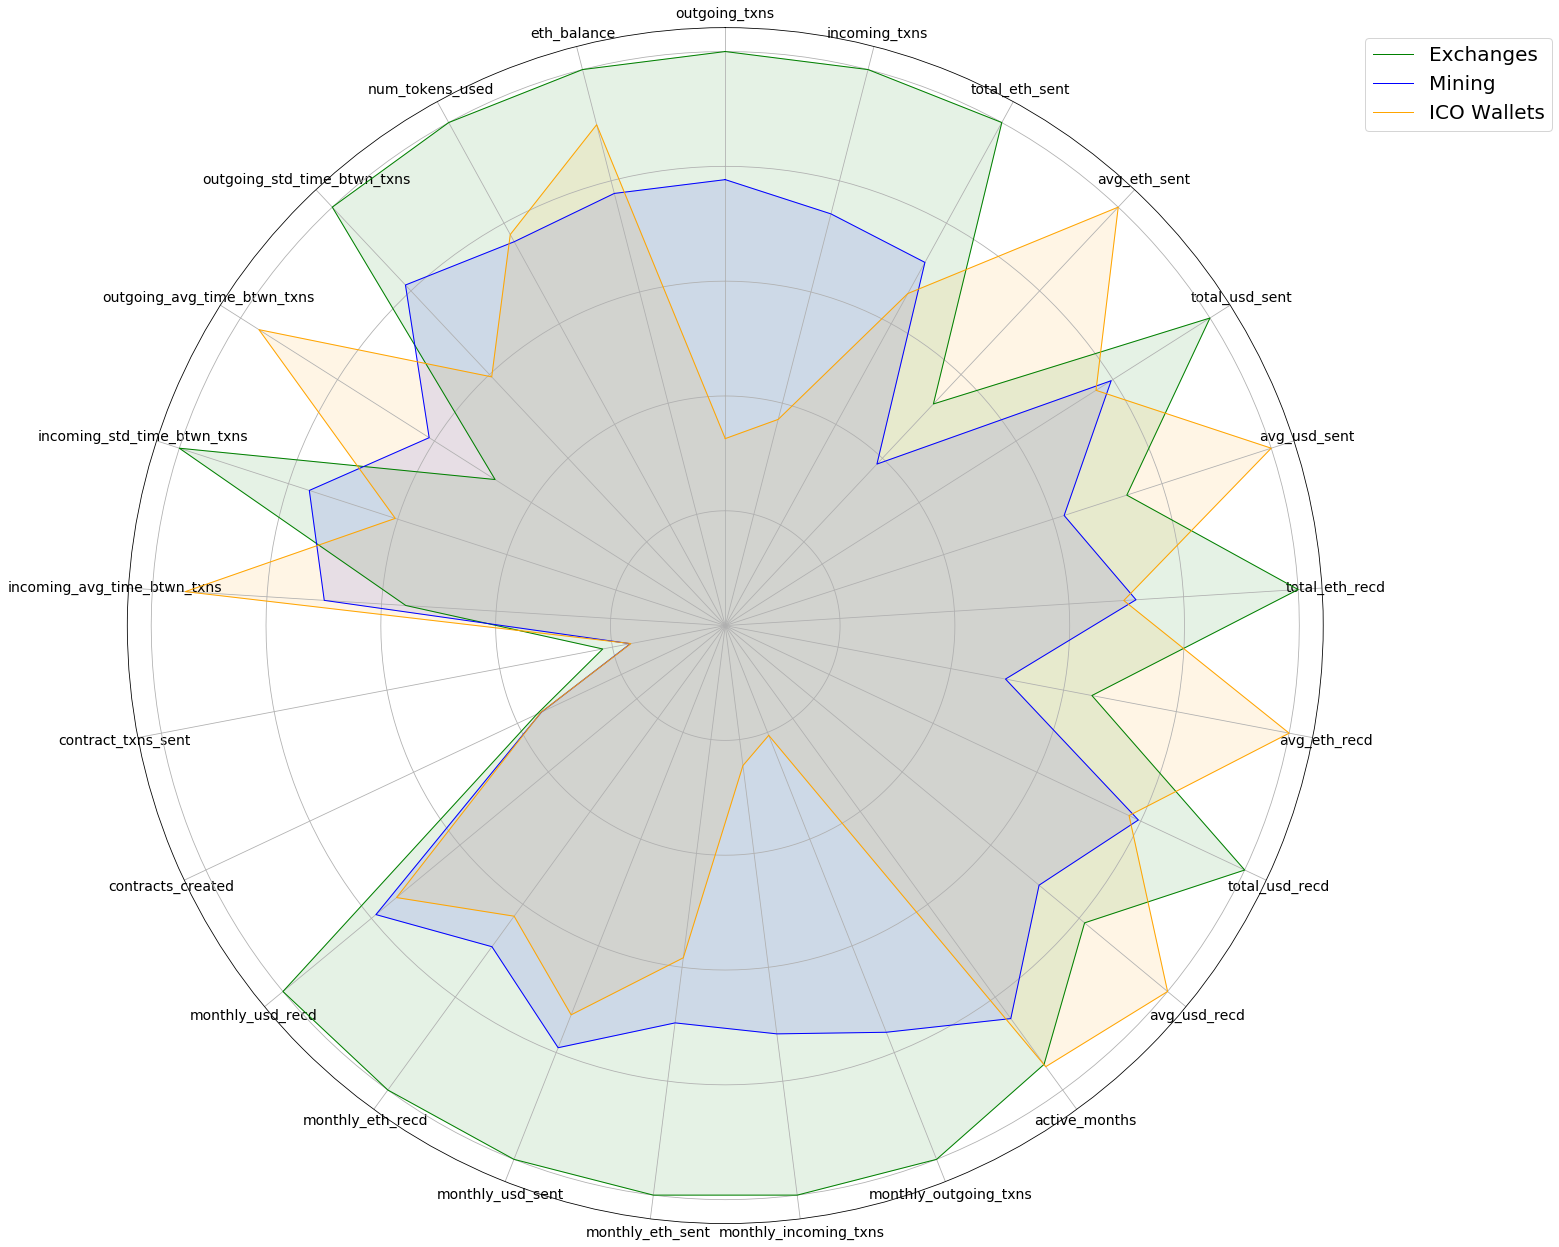

In [358]:

fig = plt.figure(figsize=(22,22))
# ------- PART 1: Create background
 
# number of variable
categories=list(df_radar)

N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
plt.xticks(fontsize=14)

# Draw ylabels
# ax.set_rlabel_position(0)
# plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
# plt.ylim(0,40)
ax.set_yticklabels([])
 
 
# ------- PART 2: Add plots
 
 
for i in range(3):
    # Ind1
    lbl = lbls[i]
    values=df_radar.loc[cats[i]].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, c=colors[i],linestyle='solid', label=lbl)
    ax.fill(angles, values, c=colors[i], alpha=0.1)

 
# Add legend
plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.2, 1))